## 0. Import Libraries & Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use("seaborn-v0_8-darkgrid")
mpl.rcParams["figure.figsize"] = (5, 3)

In [207]:
df = pd.read_csv('../C_Datasets/titanic_data_train.csv')
df.head()

,Sex,Pclass,SibSp,Parch,Alone,Embarked,Age,Ticket,Fare,Survived
0,1,3,1,0,1,2,22.0,21171,7.2500,0
1,0,1,1,0,1,0,38.0,17599,71.2833,1
2,0,3,0,0,0,2,26.0,3101282,7.9250,1
3,0,1,1,0,1,2,35.0,113803,53.1000,1
4,1,3,0,0,0,2,35.0,373450,8.0500,0


## 1. Function Transformers

✅ _Function transformers_ are the type of feature transformation technique that uses a particular function to transform the data to the normal distribution. 

✅ There is not any thumb rule for the selection of function transformers, the function can be designed by anyone good at domain knowledge of the data, but mostly there are 5 types of function transformers that are used and which also solve the issue of normal distribution almost every time.

    1- Log Transform
    2- Square Transform
    3- Square Root Transform
    4- Custom Transform

### 1.1. Log Transform

🔎 Through experiments, it is proven that log transforms performs so well on the **right-skewed** data. It transforms the right-skewed data into normally distributed data so well.

#### Step 1: Selection the feature that has right-skewed distribution to implement Log Transform.

In [208]:
df_age = df['Age']

#### Step 2: Fine-tuning for a clearer understanding.

In [209]:
for index in range(len(df_age)):
    if df_age[index] < 10:
        del df_age[index]

#### Step 3: Apply the Log Transform

In [210]:
from sklearn.preprocessing import FunctionTransformer

transform = FunctionTransformer(func=np.log1p) 
transformed_data = transform.fit_transform(df_age) 

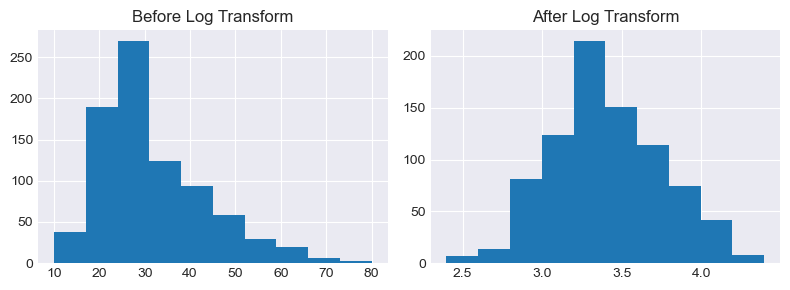

In [215]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(df_age)
ax[1].hist(transformed_data)


ax[0].set_title('Before Log Transform')
ax[1].set_title('After Log Transform')

plt.tight_layout()
plt.show()

### 1.2. Square Transform

In [156]:
transformed_data2 = np.square(transformed_data)
transformed_data2 = np.square(transformed_data2)
transformed_data2 = np.square(transformed_data2)

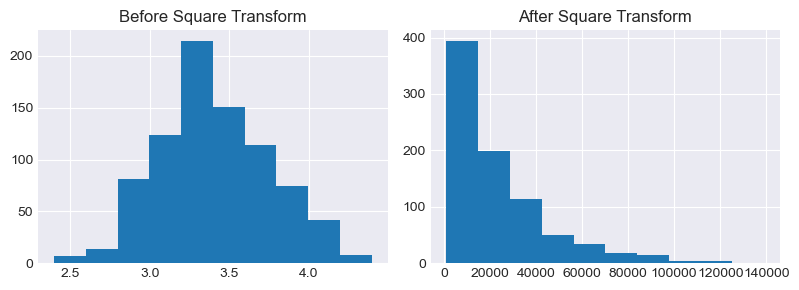

In [216]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(transformed_data)
ax[1].hist(transformed_data2)


ax[0].set_title('Before Square Transform')
ax[1].set_title('After Square Transform')

plt.tight_layout()
plt.show()

### 1.3. Square Root Transform

🔎 In this transform, the square root of the data is calculated. This transform performs so well on the **right-skewed** data and efficiently transformed the left-skewed data into normally distributed data.

In [162]:
transformed_data3 = np.sqrt(transformed_data2)
transformed_data3 = np.sqrt(transformed_data3)
transformed_data3 = np.sqrt(transformed_data3)

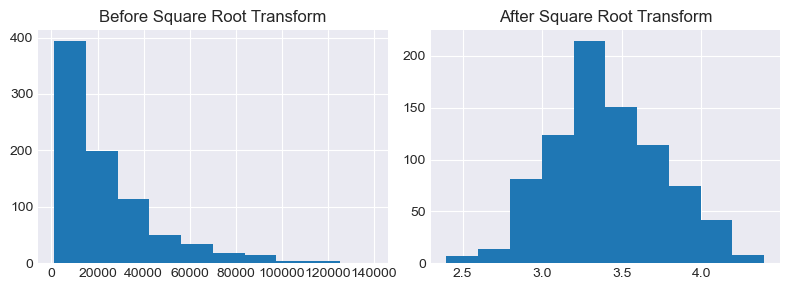

In [217]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(transformed_data2)
ax[1].hist(transformed_data3)


ax[0].set_title('Before Square Root Transform')
ax[1].set_title('After Square Root Transform')

plt.tight_layout()
plt.show()

### 1.3. Custom Transform

In [218]:
sin_tranformed_data = np.sin(transformed_data2) 
cos_tranformed_data = np.cos(transformed_data2) 
tan_tranformed_data = np.tan(transformed_data2) 

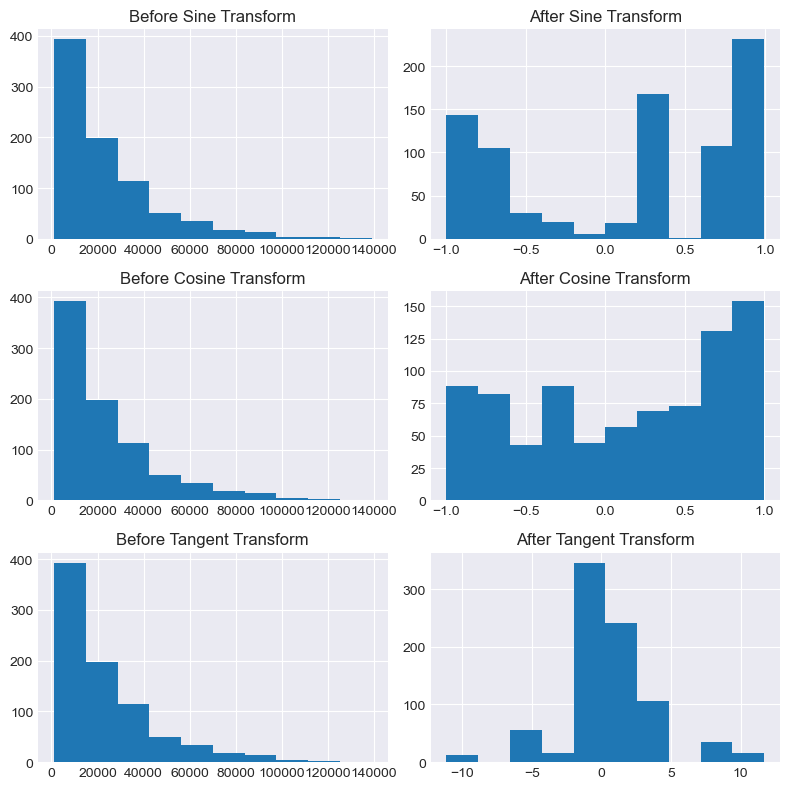

In [225]:
fig, ax = plt.subplots(3, 2, figsize=(8, 8))

ax[0, 0].hist(transformed_data2)
ax[0, 1].hist(sin_tranformed_data)
ax[0, 0].set_title("Before Sine Transform")
ax[0, 1].set_title("After Sine Transform")
                       
ax[1, 0].hist(transformed_data2)
ax[1, 1].hist(cos_tranformed_data)
ax[1, 0].set_title("Before Cosine Transform")
ax[1, 1].set_title("After Cosine Transform")
                       
ax[2, 0].hist(transformed_data2)
ax[2, 1].hist(tan_tranformed_data)
ax[2, 0].set_title("Before Tangent Transform")
ax[2, 1].set_title("After Tangent Transform")

plt.tight_layout()
plt.show()

## 2. Power Transformers

✅ Power Transformation techniques are the type of feature transformation technique where the power is applied to the data observations for transforming the data.

        1. Box-Cox Transform
        2. Yeo-Johnson Transform

### 2.1. Box-Cox Transform

🔎 Here the transformed value of every data observation will lie between 5 to -5. One major disadvantage associated with this transformation technique is that this technique can only be applied to positive observations. **it is not applicable for negative and zero values** of the data observations.

In [235]:
from sklearn.preprocessing import PowerTransformer 

boxcox = PowerTransformer(method='box-cox') 
transformed_data4 = boxcox.fit_transform(transformed_data2.values.reshape(-1, 1)) 

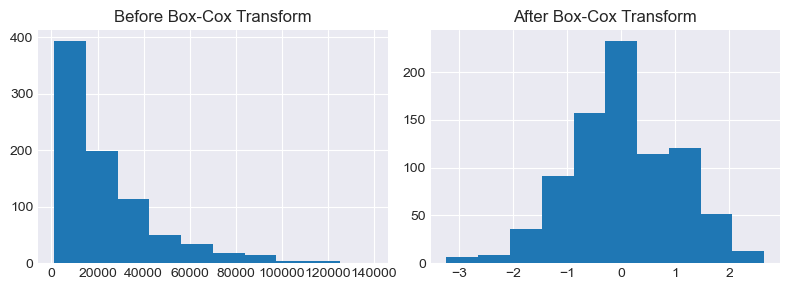

In [236]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(transformed_data2)
ax[1].hist(transformed_data4)


ax[0].set_title('Before Box-Cox Transform')
ax[1].set_title('After Box-Cox Transform')

plt.tight_layout()
plt.show()

### 2.2. Yeo Johnson Transform

🔎 This transformation technique is also a power transform technique, where the power of the data observations is applied to transform the data. This is an advanced form of a box cox transformations technique where **it can be applied to even zero and negative values** of data observations also.

In [238]:
from sklearn.preprocessing import PowerTransformer

yeo_johnson = PowerTransformer(method='yeo-johnson') 
data_transformed5 = yeo_johnson.fit_transform(transformed_data2.values.reshape(-1, 1))

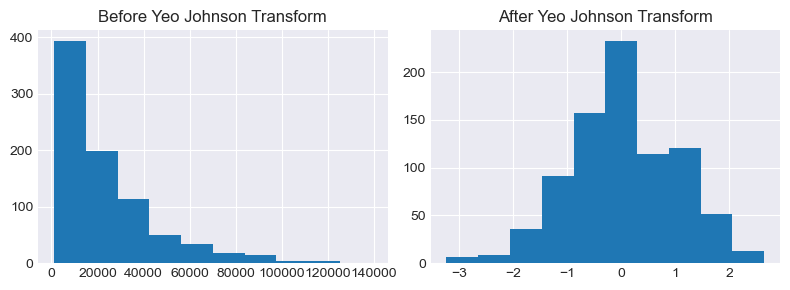

In [239]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(transformed_data2)
ax[1].hist(data_transformed5)


ax[0].set_title('Before Yeo Johnson Transform')
ax[1].set_title('After Yeo Johnson Transform')

plt.tight_layout()
plt.show()

## 3. Quantile Transformers

✅ Quantile transformation techniques are the type of feature transformation technique that can be applied to NY numerical data observations.

✅ In this transformation technique, the input data can be fed to this transformer where this transformer makes the distribution of the output data normal to fed to the further machine learning algorithm.

✅ Here there is a paramere called output_distribution, which value can be set to __uniform or normal__.

In [243]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(output_distribution='normal', n_quantiles=len(transformed_data2)) 
data_transformed6 = quantile_trans.fit_transform(transformed_data2.values.reshape(-1, 1)) 

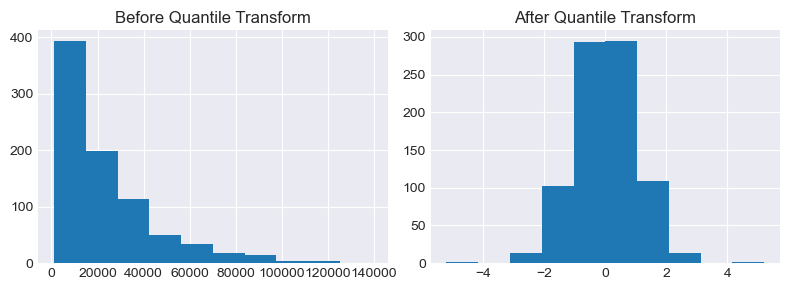

In [244]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(transformed_data2)
ax[1].hist(data_transformed6)


ax[0].set_title('Before Quantile Transform')
ax[1].set_title('After Quantile Transform')

plt.tight_layout()
plt.show()